# Statistical and Exploratory Data Analysis

---

## Description

In this notebook, we will perform some statistical and exploratory data analysis on the data we have.  
This will help us to understand the data better and to make better decisions when we will be building our model.

---

## Importing Libraries & Loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy.stats import chi2_contingency

import re

%matplotlib inline

In [5]:
df = pd.read_csv('../data/raw/new_Base_CDM_balanced_V2.csv', delimiter=';', header=[0, 1])
print(f"Shape of the dataframe: {df.shape}")
df.head()

Shape of the dataframe: (25782, 8)


,Y,X1,X2,X3,X4,X5,X6,X7
,Display,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
0,No_Displ,2.0,20.20,47400,36,CORA,72.0,No_Feat
1,No_Displ,2.0,11.90,62000,24,LECLERC,48.0,No_Feat
2,No_Displ,8.0,29.52,60661,60,AUCHAN,480.0,No_Feat
3,No_Displ,2.0,16.20,59677,19,CARREFOUR,38.0,No_Feat
4,No_Displ,5.0,62.10,142602,50,CORA,250.0,No_Feat


The dataset contains 8 columns, 7 features (`X1` to `X7`) and 1 target `Y`.
It has 25782 observations.

In [6]:
df.columns = [x + '_' + y for x, y in df.columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25782 entries, 0 to 25781
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Y_Display            25782 non-null  object 
 1   X1_cor_sales_in_vol  25782 non-null  float64
 2   X2_cor_sales_in_val  25782 non-null  float64
 3   X3_CA_mag            25782 non-null  int64  
 4   X4_value             25782 non-null  int64  
 5   X5_ENSEIGNE          25782 non-null  object 
 6   X6_VenteConv         25782 non-null  float64
 7   X7_Feature           25782 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 1.6+ MB


There seems to be no missing values, and columns are encoded in suitable data types.

In [8]:
df.columns = ['Y_display', 'X1_sales_in_vol', 'X2_sales_in_val', 'X4_turnover', 'X5_value', 'X6_sign', 'X3_sales', 'X7_feature']
df = df[['X1_sales_in_vol', 'X2_sales_in_val', 'X3_sales', 'X4_turnover', 'X5_value', 'X6_sign', 'X7_feature', 'Y_display']]
df.head()

,X1_sales_in_vol,X2_sales_in_val,X3_sales,X4_turnover,X5_value,X6_sign,X7_feature,Y_display
0,2.0,20.20,72.0,47400,36,CORA,No_Feat,No_Displ
1,2.0,11.90,48.0,62000,24,LECLERC,No_Feat,No_Displ
2,8.0,29.52,480.0,60661,60,AUCHAN,No_Feat,No_Displ
3,2.0,16.20,38.0,59677,19,CARREFOUR,No_Feat,No_Displ
4,5.0,62.10,250.0,142602,50,CORA,No_Feat,No_Displ


---

## EDA

### Numerical and Categorical Distributions

In [9]:
categorical_features = [column for column in df.columns if re.match('^X[67]',column)]
print('Categorical features: ', categorical_features)
numerical_features = [column for column in df.columns if re.match('^X[12345]',column)]
print('Numerical features: ', numerical_features)
target = [column for column in df.columns if re.match('^Y',column)]
print('Target: ', target)

Categorical features:  ['X6_sign', 'X7_feature']
Numerical features:  ['X1_sales_in_vol', 'X2_sales_in_val', 'X3_sales', 'X4_turnover', 'X5_value']
Target:  ['Y_display']


In [10]:
df[numerical_features].describe()

,X1_sales_in_vol,X2_sales_in_val,X3_sales,X4_turnover,X5_value
count,25782.000000,25782.000000,25782.000000,25782.000000,25782.000000
mean,13.767151,130.888312,587.855260,64641.184431,37.646614
std,38.203406,372.649805,1821.338396,54924.645702,23.498949
min,1.000000,1.110000,1.000000,1693.000000,1.000000
25%,2.000000,13.360000,50.000000,21394.000000,25.000000
50%,4.000000,31.050000,120.000000,51522.000000,32.000000
75%,11.000000,87.450000,380.000000,91000.000000,40.000000
max,1475.000000,13589.220000,48816.000000,284844.000000,198.000000


- Numerical features are in different scales.
- The difference between the 3rd quartile and the maximum value, as well as the difference between the mean and the median, is very large and it signals that the data is right skewed.
- We can't rely on the mean and standard deviation to explain the data, instead we need to refer to the median and interquartile range to determine the central tendency and variation of the data.

In [11]:
df[target + categorical_features].describe()

,Y_display,X6_sign,X7_feature
count,25782,25782,25782
unique,2,19,2
top,No_Displ,CARREFOUR,No_Feat
freq,13000,4629,19495


- The target feature has 2 classes, both being represented at almost the same percentage.
- The `sign` feature has lots of classes (19), leading to some having a small percentage in our dataset, and we might think of combining rare ones and ones with similar properties to reduce the complexity.

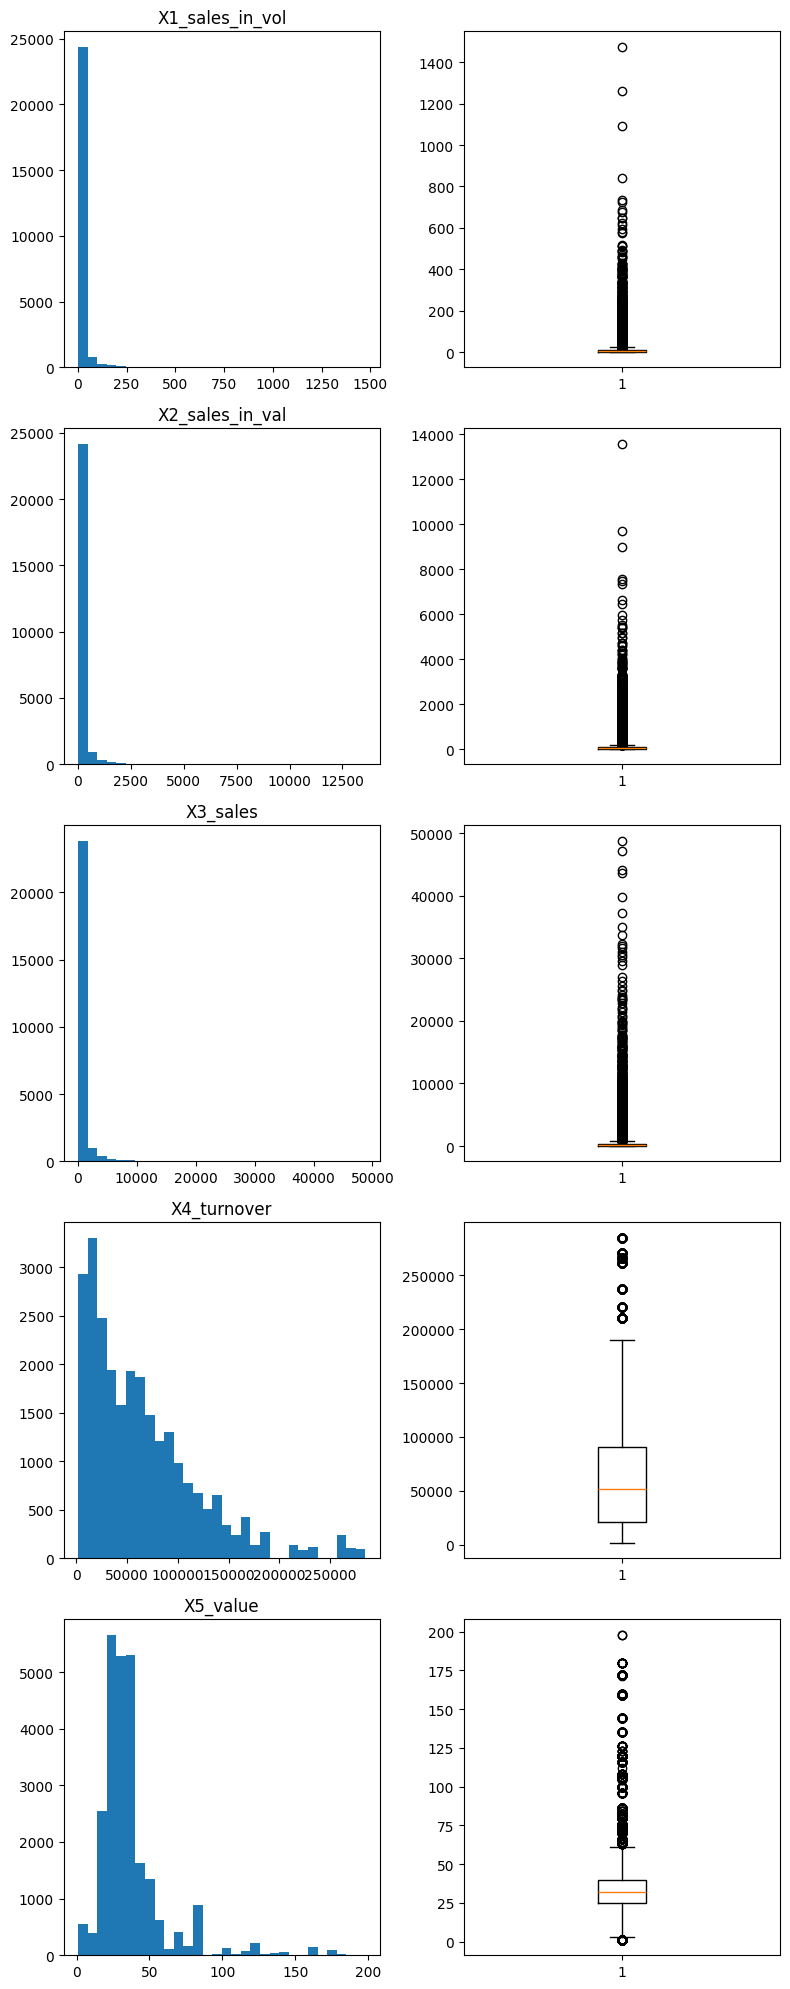

In [18]:
fig, ax = plt.subplots(5, 2, figsize=(8, 20))
for i, feature in enumerate(numerical_features):
    ax[i, 0].hist(x=df[feature], bins=30)
    ax[i, 1].boxplot(x=df[feature])
    ax[i, 0].set_title(feature)
plt.tight_layout()
plt.show()

The above histograms and boxplots confirm the fact that numerical variables are skewed to the right, some with a higher degree than others (4th and 5th features are less skewed compared to the first three).

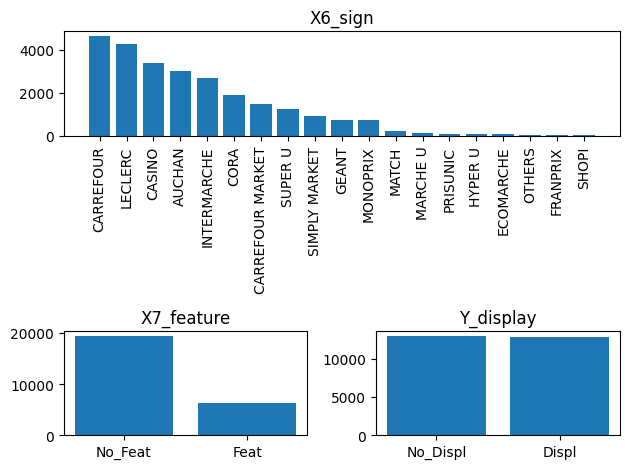

In [19]:
gs = gridspec.GridSpec(2, 2)
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[1, 1])

for feature, ax in zip(categorical_features + target, [ax1, ax2, ax3]):
    counts = df[feature].value_counts()
    ax.bar(counts.index, counts.values)
    ax.set_title(feature)

for label in ax1.get_xticklabels():
    label.set_rotation(90)

plt.tight_layout()
plt.show()

- The target only has 2 classes being equally represented.
- The feature `sign` has 19 classes with different presentations, let's look at the exact count of each class to decide on how to group them.

In [20]:
df['X6_sign'].value_counts()

X6_sign
CARREFOUR           4629
LECLERC             4257
CASINO              3370
AUCHAN              3003
INTERMARCHE         2701
CORA                1883
CARREFOUR MARKET    1500
SUPER U             1265
SIMPLY MARKET        913
GEANT                761
MONOPRIX             732
MATCH                241
MARCHE U             153
PRISUNIC              99
HYPER U               71
ECOMARCHE             69
OTHERS                60
FRANPRIX              48
SHOPI                 27
Name: count, dtype: int64

We can group every store below `MONOPRIX` in a category called `OTHER`, if we find that they have similar properties and associations with other features.

### Associations Among Features

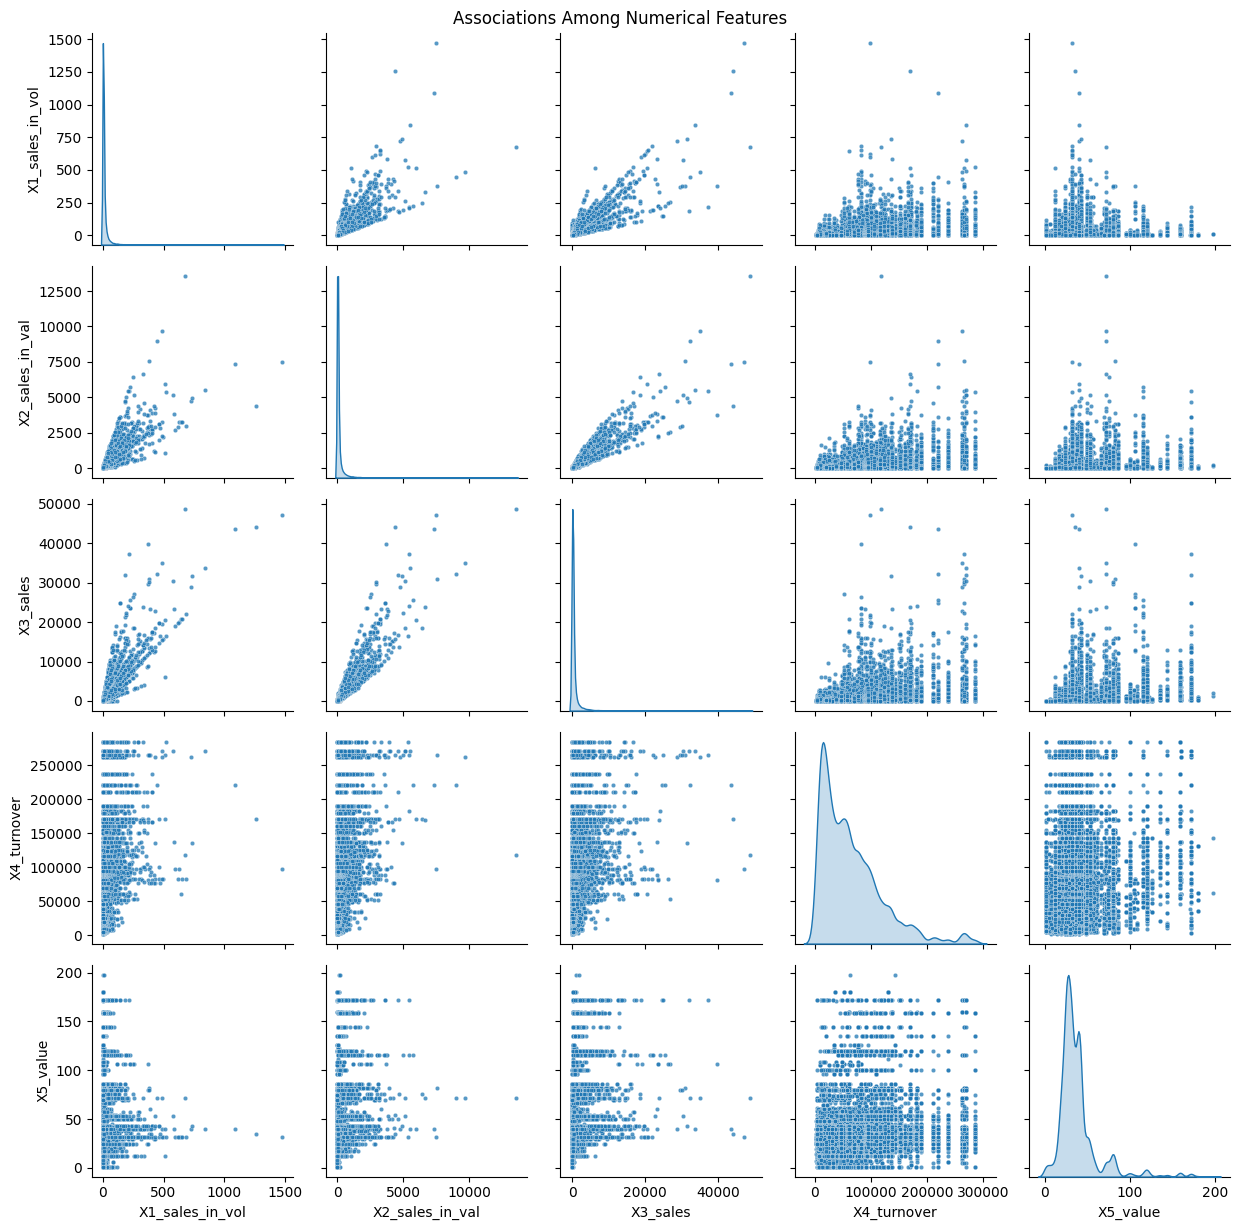

In [21]:
sns.pairplot(data=df[numerical_features], diag_kind='kde', plot_kws={'s': 10, 'alpha': 0.75})
plt.suptitle('Associations Among Numerical Features')
plt.tight_layout()
plt.show()

- We notice that there is a strong association between `X1` and `X2` and `X3`, maybe because from their names it seems that they are all related to sales.

In [22]:
df[numerical_features].corr()

,X1_sales_in_vol,X2_sales_in_val,X3_sales,X4_turnover,X5_value
X1_sales_in_vol,1.000000,0.858353,0.882588,0.266049,0.077496
X2_sales_in_val,0.858353,1.000000,0.928348,0.297886,0.230587
X3_sales,0.882588,0.928348,1.000000,0.275925,0.288883
X4_turnover,0.266049,0.297886,0.275925,1.000000,0.127276
X5_value,0.077496,0.230587,0.288883,0.127276,1.000000


- The correlation coefficients also suggest the same conclusion, which is the strong correlation between `X1`, `X2` and `X3`.

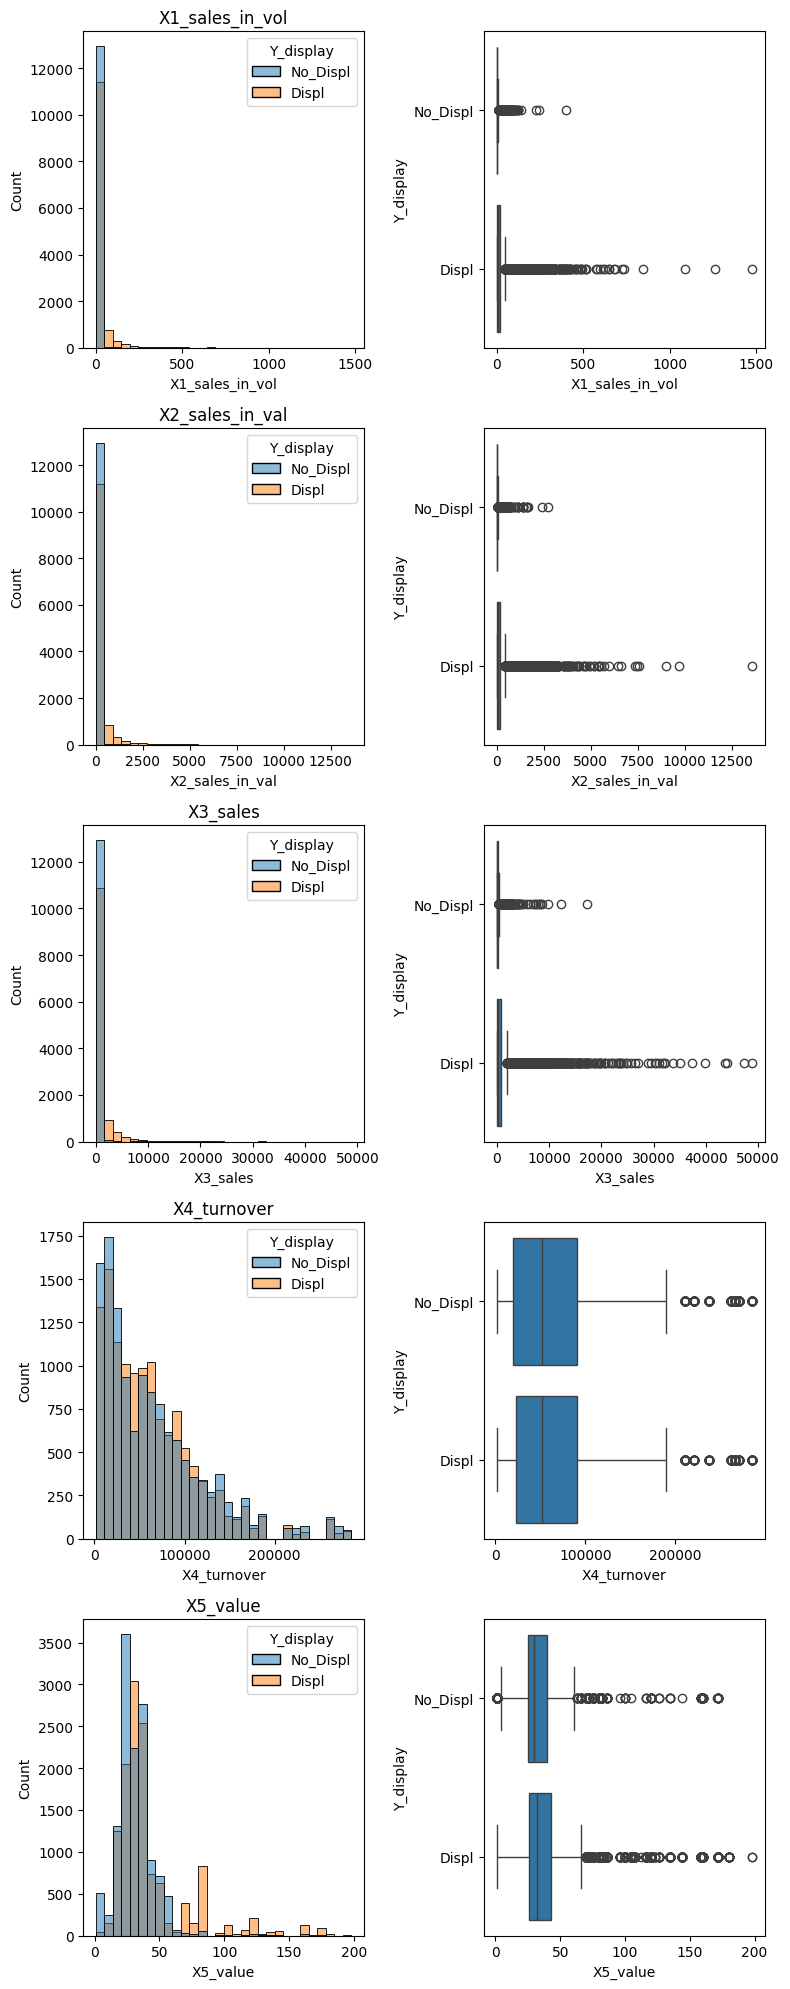

In [24]:
fig, ax = plt.subplots(5, 2, figsize=(8, 20))
for i, col in enumerate(numerical_features):
    sns.histplot(data=df, x=col, hue='Y_display', ax=ax[i, 0], bins=30)
    sns.boxplot(data=df, x=col, y='Y_display', ax=ax[i, 1])
    ax[i, 0].set_title(col)
plt.tight_layout()
plt.show()

- The distribution of each numerical variable by target suggests that overall, observations with the class `Displ` tends to have higher values for features related to sales (1, 2 and 3).
- For the features 4 and 5, we don't see a significant difference in the distribution by target, both classes seem to have the same median and interquartile range, with the class `Displ` having slightly more observations with high values.

In [34]:
contingency_table = pd.crosstab(df['X7_feature'], df['Y_display'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(contingency_table)
print("chi2 statistic", chi2)
print("p-value", p)
print("degrees of freedom", dof)
print("expected frequencies table", expected)

Y_display   Displ  No_Displ
X7_feature                 
Feat         5912       375
No_Feat      6870     12625
chi2 statistic 6571.64370381107
p-value 0.0
degrees of freedom 1
expected frequencies table [[3116.92009929 3170.07990071]
 [9665.07990071 9829.92009929]]


The results we get from the above test are the following:
- First, the assumptions that are required for performing the chi square test are satisfied.
    - The observations are independent (naïve assumption).
    - Each cell from the contingency table has enough counts to ensure that we get reliable results.
    - Our features are indeed categorical.
- Without looking at the statistic and probability, we see a huge difference between the cells in the contingency table, and we can already tell that the two variables are not independent.
- The chi-statistic is very high, with a p value very close to 0, we are sure that the two variables are highly dependent on each others.

For the other categorical feature:
- We cannot perform the chi-square test, because of the many classes that exist, that could lead to unreliable results.
- When we look at the value of the contingency table, we can tell that maybe these features are also not independent.
- The best thing we can do here is to combine the rare categories into one.

In [28]:
others = df['X6_sign'].value_counts().index[(df['X6_sign'].value_counts().values < 300)]
df.loc[df['X6_sign'].isin(others), 'X6_sign'] = 'OTHERS'

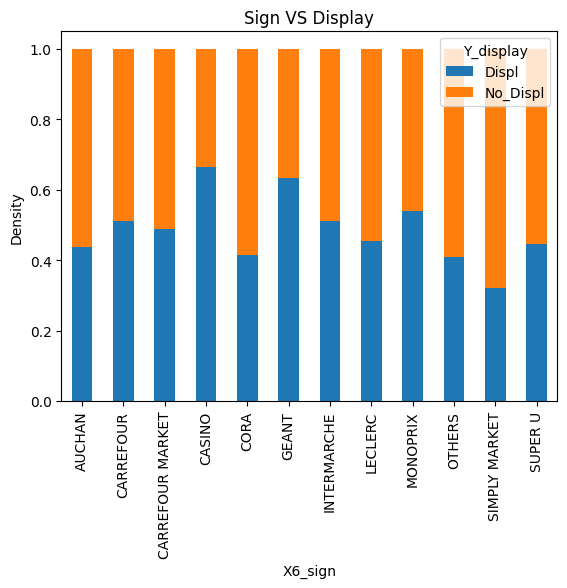

In [44]:
df.groupby(['X6_sign', 'Y_display']).size().unstack().apply(lambda x: x / x.sum(), axis=1).plot(kind='bar', stacked=True)
plt.xlabel('X6_sign')
plt.ylabel('Density')
plt.title('Sign VS Display')
plt.legend(title='Y_display')
plt.show()

Notice the disparity between the `Display` rate for each sign, there is a chance that the `X6` feature is also associated with the target.

In [32]:
!mkdir -p ../data/processed

In [33]:
df.to_csv('../data/processed/sales_cleaned.csv', index=False)

---
## Conclusion

- The dataset contains 7 features (5 numerical and 2 categorical) and 1 target category with 2 classes (binary classificaition), both being represented equally.
- There are no missing values, and columns are encoded in suitable data types.
- Numerical features are right skewed.
- There is a strong correlation between `X1`, `X2` and `X3`.
- Categorical features are associated with the target.
- Rare classes for the `X6` feature are combined into one category called `OTHER`.

We will take the new version of the data to the preprocessing step, where we'll build pipelines for transforming numerical (binning) and categorical features (encoding).